匯入pandas套件
讀取csv檔 使用utf8編碼

In [1]:
import pandas as pd

df_trail_w=pd.read_csv('trail.csv',encoding='utf8')

Ctrl+Enter to run the current cell or Shift+Enter to run the current cell and advance to the next.

In [2]:
df_trail_w.head()

,步道名稱,所在地,網址,步道難度,步道長度,所需時間,熱門度,到過人數,點閱數
0,象山親山步道,臺北市信義區,/index.php?q=trail&act=detail&id=76,低,2.3公里,所需時間 1 小時 40 分鐘,"\n\n3,200人想去\n","\n\n12,980人去過\n","\n\n454,639次點閱\n"
1,七星山主峰、東峰步道,臺北市北投區,/index.php?q=trail&act=detail&id=54,低-中,4公里,所需時間 2 小時 30 分鐘,"\n\n4,210人想去\n","\n\n11,702人去過\n","\n\n645,961次點閱\n"
2,草嶺古道,"新北市貢寮區,宜蘭縣頭城鎮",/index.php?q=trail&act=detail&id=171,低-中,8.5公里,所需時間 4 小時,"\n\n4,093人想去\n","\n\n9,207人去過\n","\n\n567,430次點閱\n"
3,擎天崗環形步道,臺北市北投區,/index.php?q=trail&act=detail&id=71,低,2.4公里,所需時間 1 小時,"\n\n2,330人想去\n","\n\n8,162人去過\n","\n\n176,510次點閱\n"
4,硬漢嶺步道(觀音山),"新北市五股區,新北市八里區",/index.php?q=trail&act=detail&id=108,低,3.2公里,所需時間 1 小時 20 分鐘,"\n\n2,349人想去\n","\n\n7,807人去過\n","\n\n412,930次點閱\n"


清除重複列後顯示dataset資訊

In [3]:
df_trail_w.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   步道名稱    1760 non-null   object
 1   所在地     1760 non-null   object
 2   網址      1760 non-null   object
 3   步道難度    1760 non-null   object
 4   步道長度    1760 non-null   object
 5   所需時間    1751 non-null   object
 6   熱門度     1760 non-null   object
 7   到過人數    1760 non-null   object
 8   點閱數     1760 non-null   object
dtypes: object(9)
memory usage: 123.9+ KB


刪除非位於台灣的步道

In [4]:
df_trail=df_trail_w[df_trail_w['所在地']!='西班牙']

匯入seaborn套件
設定畫布比例 中文顯示 字體大小
直方圖畫出步道難度數量分佈

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/97537081.py:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df_trail,x='步道難度',hue='步道難度',palette=sns.color_palette("crest",10))


<Axes: xlabel='步道難度', ylabel='Count'>

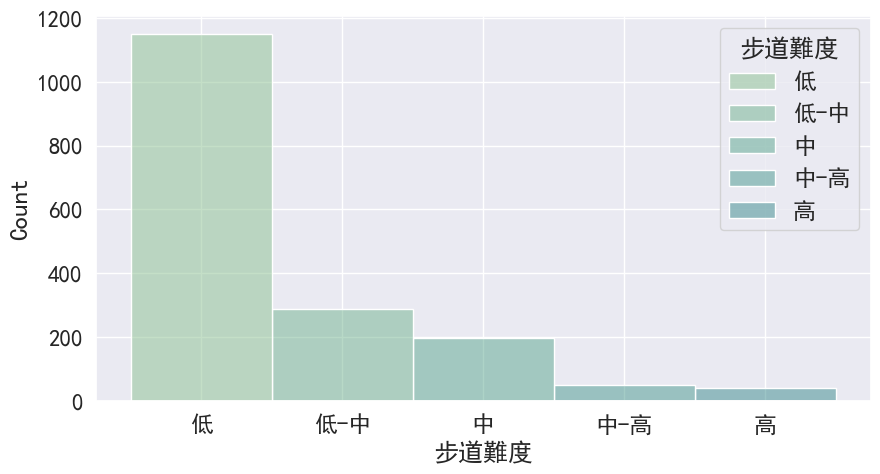

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(10,5),"font.sans-serif":'SimHei'},font_scale=1.5)

sns.histplot(data=df_trail,x='步道難度',hue='步道難度',palette=sns.color_palette("crest",10))

資料清理
將欄位內的千份位符號移除

In [9]:
df_trail['熱門度'] = df_trail['熱門度'].str.replace(',', '')
df_trail['到過人數'] = df_trail['到過人數'].str.replace(',', '')
df_trail['點閱數'] = df_trail['點閱數'].str.replace(',', '')

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/3457301079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trail['熱門度'] = df_trail['熱門度'].str.replace(',', '')
/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/3457301079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trail['到過人數'] = df_trail['到過人數'].str.replace(',', '')
/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/3457301079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

資料清理
只將數字截取出來

In [10]:
df_trail['熱門度'] = df_trail['熱門度'].str.extract('(\d+)')
df_trail['到過人數'] = df_trail['到過人數'].str.extract('(\d+)')
df_trail['點閱數'] = df_trail['點閱數'].str.extract('(\d+)')

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/342706931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trail['熱門度'] = df_trail['熱門度'].str.extract('(\d+)')
/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/342706931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trail['到過人數'] = df_trail['到過人數'].str.extract('(\d+)')
/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/342706931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

資料清理
轉換資料型態為float

In [11]:
df_trail[['熱門度','到過人數','點閱數']]=df_trail[['熱門度','到過人數','點閱數']].astype('float')

/var/folders/dw/dqhp_ysx01s6vtxxppnxs6zh0000gn/T/ipykernel_7304/724764806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trail[['熱門度','到過人數','點閱數']]=df_trail[['熱門度','到過人數','點閱數']].astype('float')


資料視覺化
篩選出步道數最多的鄉鎮前10名
以直方圖表示

In [12]:
df_trail_area=df_trail.groupby(['所在地']).size().reset_index(name="步道數").sort_values('步道數', ascending=False)

In [13]:
df_trail_area_top10=df_trail_area.head(10)

[Text(0, 0, '新北市瑞芳區'),
 Text(1, 0, '花蓮縣秀林鄉'),
 Text(2, 0, '南投縣仁愛鄉'),
 Text(3, 0, '嘉義縣阿里山鄉'),
 Text(4, 0, '台北市北投區'),
 Text(5, 0, '台中市和平區'),
 Text(6, 0, '南投縣鹿谷鄉'),
 Text(7, 0, '新竹縣尖石鄉'),
 Text(8, 0, '台北市士林區'),
 Text(9, 0, '南投縣仁愛鄉,花蓮縣秀林鄉')]

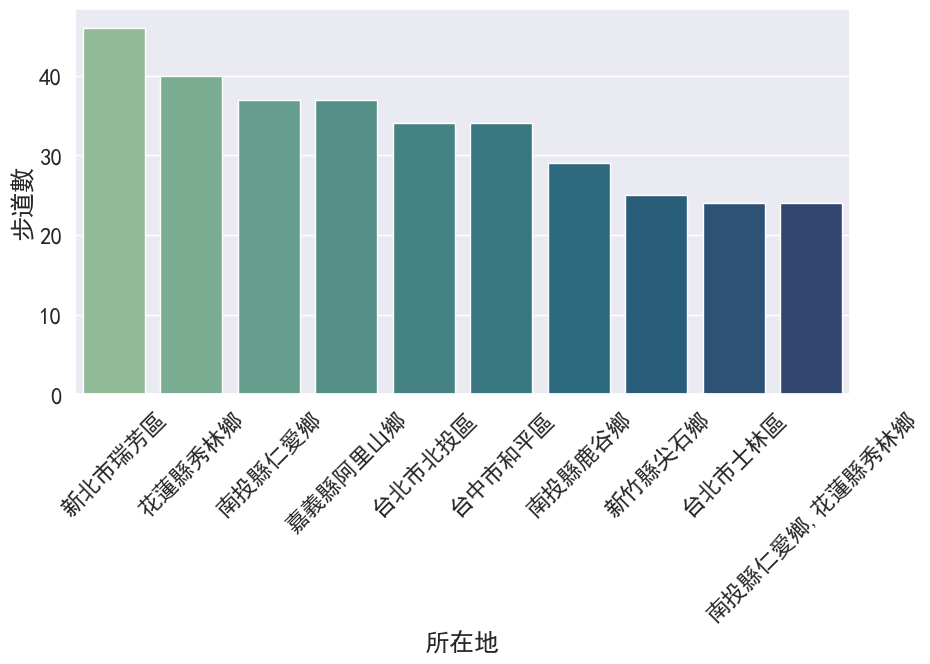

In [14]:
sns.barplot(data=df_trail_area_top10,x='所在地',y='步道數',errorbar=None,palette=sns.color_palette("crest",10)).set_xticklabels(df_trail_area_top10['所在地'],rotation=45)

資料視覺化
篩選出哪些鄉鎮擁有最多難度高的步道

In [15]:
df_trail_diff=df_trail.groupby(['所在地','步道難度']).size().reset_index(name="步道數").sort_values('步道數',ascending=False)

In [19]:
df_trail_diff_new=df_trail[df_trail['步道難度']=='高']
df_trail_diff_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 302 to 1749
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   步道名稱    42 non-null     object 
 1   所在地     42 non-null     object 
 2   網址      42 non-null     object 
 3   步道難度    42 non-null     object 
 4   步道長度    42 non-null     object 
 5   所需時間    42 non-null     object 
 6   熱門度     42 non-null     float64
 7   到過人數    42 non-null     float64
 8   點閱數     42 non-null     float64
dtypes: float64(3), object(6)
memory usage: 3.3+ KB


因有些步道的起點及終點並非位於同一個鄉鎮，同一個欄位會有超過一筆的資料，須將資料分開後計算
先將同欄位的資料分割至新的欄位並合併在同一欄以計算個數

In [17]:
df_diff_new_1=df_trail_diff_new['所在地'].str.split(',', expand=True)
df_diff_new_1

,0,1,2,3
302,臺中市和平區,宜蘭縣南澳鄉,花蓮縣秀林鄉,None
559,南投縣信義鄉,嘉義縣阿里山鄉,高雄市桃源區,None
644,南投縣仁愛鄉,花蓮縣秀林鄉,花蓮縣萬榮鄉,None
692,南投縣仁愛鄉,花蓮縣秀林鄉,None,None
694,台中市和平區,宜蘭縣大同鄉,花蓮縣秀林鄉,None
710,南投縣信義鄉,高雄市桃源區,花蓮縣卓溪鄉,臺東縣海端鄉
757,南投縣信義鄉,花蓮縣卓溪鄉,None,None
766,新竹縣尖石鄉,苗栗縣泰安鄉,None,None
789,南投縣信義鄉,嘉義縣阿里山鄉,高雄市桃源區,None
809,台中市和平區,None,None,None


In [18]:
df_diff_new_2=df_diff_new_1.stack().reset_index().drop('level_0', axis=1).drop('level_1', axis=1).rename(columns={0: '所在地'})
df_diff_new_2

,所在地
0,臺中市和平區
1,宜蘭縣南澳鄉
2,花蓮縣秀林鄉
3,南投縣信義鄉
4,嘉義縣阿里山鄉
...,...
87,花蓮縣卓溪鄉
88,花蓮縣卓溪鄉
89,臺東縣海端鄉
90,南投縣信義鄉


In [20]:
df_diff_new_2.groupby('所在地').size()

所在地
南投縣仁愛鄉      6
南投縣信義鄉     12
台中市和平區     10
台東縣卑南鄉      1
嘉義縣阿里山鄉     2
宜蘭縣南澳鄉      1
宜蘭縣大同鄉      4
屏東縣泰武鄉      1
屏東縣霧臺鄉      1
新竹縣尖石鄉      6
臺中市和平區      4
臺東縣海端鄉      5
臺東縣金峰鄉      1
花蓮縣卓溪鄉     10
花蓮縣瑞穗鄉      1
花蓮縣秀林鄉     14
花蓮縣萬榮鄉      3
苗栗縣泰安鄉      5
高雄市桃源區      4
高雄市茂林區      1
dtype: int64

將鄉鎮所在地經緯度以dictionary帶入

In [21]:
df_diff_new_2["經緯度"]=df_diff_new_2["所在地"].map({'南投縣信義鄉':'23.794319, 120.944231','花蓮縣卓溪鄉':'23.274397, 121.264392',
                                               '花蓮縣秀林鄉':'24.311793, 121.734273','新竹縣尖石鄉':'24.611768, 121.296301',
                                               '苗栗縣泰安鄉':'24.467119, 120.941871','台中市和平區':'24.319567, 121.312803',
                                               '宜蘭縣大同鄉':'24.551094, 121.519979','南投縣仁愛鄉':'24.020211, 121.118541',
                                               '南投縣信義鄉':'23.794319, 120.944231','嘉義縣阿里山鄉':'23.436933, 120.786036',
                                               '高雄市桃源區':'23.230033, 120.848334','臺東縣海端鄉':'23.131142, 121.173398',
                                               '台東縣卑南鄉':'22.785318, 121.083663','宜蘭縣南澳鄉':'24.407593, 121.675782',
                                               '屏東縣泰武鄉':'22.577971, 120.635097','屏東縣霧臺鄉':'22.751222, 120.784422',
                                               '臺中市和平區':'24.319567, 121.312803','臺東縣金峰鄉':'22.560693, 120.875572',
                                               '花蓮縣瑞穗鄉':'23.521210, 121.412967','花蓮縣萬榮鄉':'23.577784, 121.362514',
                                               '苗栗縣泰安鄉':'24.384375, 121.036025','高雄市茂林區':'22.932961, 120.7325514'})
                                               
                                            

In [22]:
df_diff_new_2

,所在地,經緯度
0,臺中市和平區,"24.319567, 121.312803"
1,宜蘭縣南澳鄉,"24.407593, 121.675782"
2,花蓮縣秀林鄉,"24.311793, 121.734273"
3,南投縣信義鄉,"23.794319, 120.944231"
4,嘉義縣阿里山鄉,"23.436933, 120.786036"
...,...,...
87,花蓮縣卓溪鄉,"23.274397, 121.264392"
88,花蓮縣卓溪鄉,"23.274397, 121.264392"
89,臺東縣海端鄉,"23.131142, 121.173398"
90,南投縣信義鄉,"23.794319, 120.944231"


製作經度及緯度欄位
分割經緯度資料，轉換資料型態為float，帶回原dataframe設定欄位名稱

In [23]:
df_lat=df_diff_new_2["經緯度"].str.split(',',expand=True)
df_lat[[0,1]].astype('float')
df_diff_new_2["經度"]=df_lat[0]
df_diff_new_2["緯度"]=df_lat[1]
df_diff_new_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   所在地     92 non-null     object
 1   經緯度     92 non-null     object
 2   經度      92 non-null     object
 3   緯度      92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


匯入folium套件
繪出高難度步道所位於的鄉鎮及數量

In [24]:
import folium # 匯入 folium 套件
from folium import plugins


fmap_2 = folium.Map(location=[23.443232, 121.265364], zoom_start=8)
cases= plugins.MarkerCluster().add_to(fmap_2)


lat1= list(df_diff_new_2["經度"])
lon1= list(df_diff_new_2["緯度"])
#labels=list(df_new_result["步道數"])


for lat,lon in zip(lat1,lon1):
    folium.Marker([lat,lon]).add_to(cases)
    
 
    


fmap_2


運用熱力圖來繪出高難度步道區域的分佈，可以看出多位於宜蘭花蓮交界

In [25]:
from folium.plugins import HeatMap

fmap_3 = folium.Map(location=[23.443232, 121.265364], zoom_start=7)

heatdata = df_diff_new_2[['經度','緯度']].values.tolist()
HeatMap(heatdata).add_to(fmap_3)
     
fmap_3